In [1]:
make_live = False
email_both = False
send_email = False

In [2]:
from pydataquery import DataQuery
import pandas as pd
from xbbg import blp
import numpy as np
import pytz
import time
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact, Dropdown, HBox, VBox, Button, Output, Text, widgets
from IPython.display import display, clear_output
import sympy as sp
from sklearn.metrics import r2_score
from scipy.stats import zscore
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import itertools
import warnings
import pyautogui
import pythoncom
import subprocess
import pygetwindow as gw
import time
warnings.filterwarnings("ignore")

if make_live:

    dq = DataQuery(
        client_id='jbAIMF2Tkp0JO3sc',
        client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
        # calendar = 'CAL_USBANK',
    )
    
    labels = { "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | ATM Implied Volatility":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_IVOL_CAL)", "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | Realized Volatility":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_HVOL)", "CDX Options | IG Main | Standard |  | On the Run (5y) | 3 month | Volatility Skew (75-25 Delta)":"DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_VOL_SKEW_CAL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | ATM Implied Volatility":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_IVOL_CAL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | Realized Volatility":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_HVOL)", "CDX Options | HY Main | Standard |  | On the Run (5y) | 3 month | Volatility Skew (75-25 Delta)":"DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_VOL_SKEW_CAL)", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Main | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Crossover | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPESEN05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Senior Financial | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Implied Vol":"DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Realised Vol":"STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPESUB05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "iTraxx Options (% of ATM) | Sub Financial | 100% | 3 month | Volatility Skew (25 Delta)":"DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)"}
    
    new_labels = {}
    for key, val in labels.items():
        if "CDX" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[5]}_{key.split(" | ")[6]}")
        if "iTraxx" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[3]}_{key.split(" | ")[4]}")
        new_key = new_key.replace("IG Main","CDX IG 5Y").replace("HY Main","CDX HY 5Y").\
            replace("Main","ITRX Main 5Y").replace("Crossover","ITRX Xover 5Y").replace("Senior Financial","ITRX SNRFIN 5Y").\
            replace("Sub Financial","ITRX SUBFIN 5Y").replace("3 month","3M").replace("ATM Implied Volatility","iVol").\
            replace("Realized Volatility","rVol")#.replace("Volatility Skew (75-25 Delta)","Vol
        new_labels[new_key] = val
        # print(new_key)
    
    labels={"CDX Options | IG Main | Delta based Strikes | 25% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,25D_3M_IVOL)", "CDX Options | IG Main | Delta based Strikes | 50% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,50D_3M_IVOL)", "CDX Options | HY Main | Delta based Strikes | 25% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,25D_3M_IVOL)", "CDX Options | HY Main | Delta based Strikes | 50% | On the Run (5y) | 3 month | Implied Volatility" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,50D_3M_IVOL)", "iTraxx Options (Delta) | Main | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Main | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Crossover | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Crossover | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Senior Financial | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Senior Financial | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESENUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Sub Financial | 25% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "iTraxx Options (Delta) | Sub Financial | 50% | 3 month | Implied Vol" : "DB(CDS,TRAC-X,EUROPESUBUNF05ONRUN_NEW_P50D_3M_INTERP,JPM_VOL)"}
    
    for key, val in labels.items():
        if "CDX" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[3]}_{key.split(" | ")[5]}_{key.split(" | ")[6]}")
        if "iTraxx" in key.split(" | ")[0]:
            new_key = (f"{key.split(" | ")[1]}_{key.split(" | ")[2]}_{key.split(" | ")[3]}_{key.split(" | ")[4]}")
        new_key = new_key.replace("IG Main","CDX IG 5Y").replace("HY Main","CDX HY 5Y").\
            replace("Main","ITRX Main 5Y").replace("Crossover","ITRX Xover 5Y").replace("Senior Financial","ITRX SNRFIN 5Y").\
            replace("Sub Financial","ITRX SUBFIN 5Y").replace("3 month","3M").replace("Implied Volatility","iVol").\
            replace("Implied Vol","iVol")
        new_labels[new_key] = val
    
    labels = { "HYG 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "HYG 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "HYG 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "HYG 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "HYG 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE))) ) * SQRT(260) * 100" , "HYG 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "HYG 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "HYG 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_HYG/PRICE)" , "LQD 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "LQD 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "LQD 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "LQD 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "LQD 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE))) ) * SQRT(260) * 100" , "LQD 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "LQD 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "LQD 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_LQD/PRICE)" , "IHYG 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "IHYG 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "IHYG 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "IHYG 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "IHYG 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE))) ) * SQRT(260) * 100" , "IHYG 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "IHYG 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "IHYG 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_IHYG/PRICE)" , "TLT 1M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M Realised Vol" : "STDDEV(22 * 1, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 1M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_1M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 1M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_1M_INTERP/JPM_FORWARD)" , "TLT 1M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)" , "TLT 3M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_3M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M Realised Vol" : "STDDEV(22 * 3, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 3M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_3M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 3M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_3M_INTERP/JPM_FORWARD)" , "TLT 3M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)" , "TLT 6M ATMF Implied Vol" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_6M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M Realised Vol" : "STDDEV(22 * 6, LOG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE) + ZEROIFNA(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/DIV_EX))) - LOG(LAG(DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE))) ) * SQRT(260) * 100" , "TLT 6M Vol. Skew(25 Delta)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_25D_6M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_25D_6M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M Calendar Skew (3M - 1M)" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_3M_INTERP/JPM_IMPLIEDVOL)*100 - DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_PUT_50D_1M_INTERP/JPM_IMPLIEDVOL)*100" , "TLT 6M ATM FWD" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT_OPT_CALL_100PCTF_6M_INTERP/JPM_FORWARD)" , "TLT 6M Spot" : "DB(NEO-UK,CREDRESEARCH/EU/EU_ETF_TLT/PRICE)",
        "IG OTR Option 5Y 1M ATM Implied Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATM_IVOL_CAL)", "IG OTR Option 5Y 1M Realized Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_HVOL)", "IG OTR Option 5Y 1M Implied BP Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATM_S_BE_CAL)", "IG OTR Option 5Y 1M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_ATMF_CAL)", "IG OTR Option 5Y 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,1M_VOL_SKEW_CAL)", "IG OTR Option 5Y 1M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR Option 5Y 3M ATM Implied Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_IVOL_CAL)", "IG OTR Option 5Y 3M Realized Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_HVOL)", "IG OTR Option 5Y 3M Implied BP Vol" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATM_S_BE_CAL)", "IG OTR Option 5Y 3M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_ATMF_CAL)", "IG OTR Option 5Y 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,3M_VOL_SKEW_CAL)", "IG OTR Option 5Y 3M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR Option 5Y 6M ATM Forward Spread" : "DB(CDS,TRAC-X,NAIGMAINSWAP05YONRUN,6M_ATMF_CAL)", "IG OTR Option 5Y 6M Spot" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "HY OTR Option 5Y 1M ATM Implied Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATM_S_IVOL_CAL)", "HY OTR Option 5Y 1M Realized Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_S_HVOL)", "HY OTR Option 5Y 1M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATMF_S_CAL)", "HY OTR Option 5Y 1M Implied BP Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATM_S_BE_CAL)", "HY OTR Option 5Y 1M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_ATMF_CAL)", "HY OTR Option 5Y 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,1M_S_VOL_SKEW_CAL)", "HY OTR Option 5Y 1M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "HY OTR Option 5Y 3M ATM Implied Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_IVOL_CAL)", "HY OTR Option 5Y 3M Realized Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_HVOL)", "HY OTR Option 5Y 3M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATMF_S_CAL)", "HY OTR Option 5Y 3M Implied BP Vol" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATM_S_BE_CAL)", "HY OTR Option 5Y 3M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_ATMF_CAL)", "HY OTR Option 5Y 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,3M_S_VOL_SKEW_CAL)", "HY OTR Option 5Y 3M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "HY OTR Option 5Y 6M ATM Forward Spread" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,6M_ATMF_S_CAL)", "HY OTR Option 5Y 6M ATM Forward Price" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,6M_ATMF_CAL)", "HY OTR Option 5Y 6M Spot" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CLEAN_MID)", "EM OTR Option 1M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATM_S_IVOL_CAL)", "EM OTR Option 1M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_S_HVOL)", "EM OTR Option 1M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATMF_S_CAL)", "EM OTR Option 1M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATM_S_BE_CAL)", "EM OTR Option 1M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_ATMF_CAL)", "EM OTR Option 1M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,1M_S_VOL_SKEW_CAL)", "EM OTR Option 1M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 2M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATM_S_IVOL_CAL)", "EM OTR Option 2M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_S_HVOL)", "EM OTR Option 2M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATMF_S_CAL)", "EM OTR Option 2M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATM_S_BE_CAL)", "EM OTR Option 2M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_ATMF_CAL)", "EM OTR Option 2M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,2M_S_VOL_SKEW_CAL)", "EM OTR Option 2M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 3M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATM_S_IVOL_CAL)", "EM OTR Option 3M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_S_HVOL)", "EM OTR Option 3M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATMF_S_CAL)", "EM OTR Option 3M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATM_S_BE_CAL)", "EM OTR Option 3M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_ATMF_CAL)", "EM OTR Option 3M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,3M_S_VOL_SKEW_CAL)", "EM OTR Option 3M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 4M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATM_S_IVOL_CAL)", "EM OTR Option 4M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_S_HVOL)", "EM OTR Option 4M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATMF_S_CAL)", "EM OTR Option 4M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATM_S_BE_CAL)", "EM OTR Option 4M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_ATMF_CAL)", "EM OTR Option 4M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,4M_S_VOL_SKEW_CAL)", "EM OTR Option 4M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "EM OTR Option 5M ATM Implied Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATM_S_IVOL_CAL)", "EM OTR Option 5M Realized Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_S_HVOL)", "EM OTR Option 5M ATM Forward Spread" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATMF_S_CAL)", "EM OTR Option 5M Implied BP Vol" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATM_S_BE_CAL)", "EM OTR Option 5M ATM Forward Price" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_ATMF_CAL)", "EM OTR Option 5M Vol Skew 75-25 Delta" : "DB(CDS,TRAC-X,EMCDXONRUN,5M_S_VOL_SKEW_CAL)", "EM OTR Option 5M Spot" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CLEAN_MID)", "IG OTR 3Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF03ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 5Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF05ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 7Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF07ONRUN,JPM_CDSSPREAD_MID)", "IG OTR 10Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF10ONRUN,JPM_CDSSPREAD_MID)", "IG Roll-Adj. 5 Y Sprd" : "DB(CDS,TRAC-X,NAMERI100UNF05RISKNDEFAULT,JPM_CDSSPREAD_MID)", "HY OTR 3Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF03ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 5Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF05ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 7Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF07ONRUN,JPM_CDSSPREAD_MID)", "HY OTR 10Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF10ONRUN,JPM_CDSSPREAD_MID)", "HY Roll-Adj. 5 Y Sprd" : "DB(CDS,TRAC-X,NAHY100UNF05RISKNDEFAULT,JPM_CDSSPREAD_MID)", "Emerging Markets CDX.EM On the run 5Y Sprd" : "DB(NEO-UK,credit/cds/index/cdxEM-onrun/5y/JPM_CDSSPREAD_MID)", "Main 100% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "Main 100% 3M Realised Vol_Call" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Main 100% 3M Vol Skew 25 Delta_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 100% 3M Calendar Skew 3M - 1M_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C100P_1M_INTERP,JPM_ATMVOL)", "Main 100% 3M CDS Spread Adj._Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Main 100% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)", "Main 100% 3M Realised Vol_Put" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEEUR05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Main 100% 3M Vol Skew 25 Delta_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 100% 3M Calendar Skew 3M - 1M_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P100P_1M_INTERP,JPM_ATMVOL)", "Main 100% 3M CDS Spread Adj._Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Xover 100% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)", "Xover 100% 3M Realised Vol_Call" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Xover 100% 3M Vol Skew 25 Delta_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 100% 3M Calendar Skew 3M - 1M_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C100P_1M_INTERP,JPM_ATMVOL)", "Xover 100% 3M CDS Spread Adj._Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Xover 100% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)", "Xover 100% 3M Realised Vol_Put" : "STDDEV(21 * 3,DB(NEO-UK,CREDRESEARCH/EU/EUROPEHY05ONRUN/JPM_LOG_SPR_RET))*SQRT(252)/100", "Xover 100% 3M Vol Skew 25 Delta_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 100% 3M Calendar Skew 3M - 1M_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_3M_INTERP,JPM_ATMVOL)-DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P100P_1M_INTERP,JPM_ATMVOL)", "Xover 100% 3M CDS Spread Adj._Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN,JPM_CDSSPREAD_ADJ)", "Main 25% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Main 25% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "Main 75% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_C75D_3M_INTERP,JPM_VOL)", "Main 75% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEEURUNF05ONRUN_NEW_P75D_3M_INTERP,JPM_VOL)", "Xover 25% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C25D_3M_INTERP,JPM_VOL)", "Xover 25% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P25D_3M_INTERP,JPM_VOL)", "Xover 75% 3M Implied Vol_Call" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_C75D_3M_INTERP,JPM_VOL)", "Xover 75% 3M Implied Vol_Put" : "DB(CDS,TRAC-X,EUROPEHYUNF05ONRUN_NEW_P75D_3M_INTERP,JPM_VOL)", "Main OTR 5Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx-onrun/5y/JPM_CDSSPREAD_MID)", "Main OTR 5Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeEur5yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Main OTR 10Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx-onrun/10y/JPM_CDSSPREAD_MID)", "Main OTR 10Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeEur10yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Xover OTR 5Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx_crossover-onrun/5y/JPM_CDSSPREAD_MID)", "Xover OTR 5Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeHy5yOnrun,JPM_CDSSPREAD_CM_ADJ)", "Xover OTR 10Y Sprd" : "DB(NEO-UK,credit/cds/index/itraxx_crossover-onrun/10y/JPM_CDSSPREAD_MID)", "Xover OTR 10Y Roll-Adj. Sprd" : "DB(CDS,TRAC-X,EuropeHy10yOnrun,JPM_CDSSPREAD_CM_ADJ)"}
    
    labels = new_labels
    
    job = dq.create_job(expressions = list(labels.values()))
    dq.start_date = 'TODAY-10Y'
    job.execute()
    df = job.to_dataframe()
    df = job.to_pivot_table()
    df = df.T
    df = df[list(labels.values())]
    df.index.name = 'Date'
    df.index = pd.to_datetime(df.index, format='%Y%m%d').date
    
    df.rename(columns={v:k for k, v in labels.items()},inplace=True)
    df.columns.name = None
    clear_output(wait=False)
    df.index = pd.to_datetime(df.index)
    df.to_parquet("DQ Option Data.parquet")
else:
    df = pd.read_parquet("DQ Option Data.parquet")

In [3]:
if make_live:
    file_path = r"J:\\56. Vol Daily Emails\\Equity Index Data.xlsx"
    window_title = "Equity Index Data - Excel"
    
    subprocess.Popen(['start', 'excel', file_path], shell=True)
    time.sleep(10)
    
    excel_windows = [window for window in gw.getWindowsWithTitle('Excel')]
    
    for window in excel_windows:
        if window_title in window.title:
            window.activate()
            break
    
    time.sleep(5)
    pyautogui.hotkey('ctrl', 's')
    time.sleep(5)
    pyautogui.hotkey('alt', 'f4')
    time.sleep(2)
    pyautogui.hotkey('enter')
    time.sleep(2)

In [4]:
df = pd.read_parquet("DQ Option Data.parquet")
df.index = pd.to_datetime(df.index)
df2 = pd.read_excel("Equity Index Data.xlsx", parse_dates=True).iloc[2:,:]
all_df = None
for i in range(len(df2.columns))[::2]:
    current_df = df2.iloc[:,[i,i+1]]
    current_df.columns = ["Date",current_df.columns[1]]
    current_df = current_df.set_index("Date")
    current_df = current_df[~pd.isna(current_df.index)]
    all_df = pd.concat([all_df,current_df],axis=1)    

new_col = []
for item in all_df.columns:
    if len(item.split("_"))==4:
        new_col += [item.split("_")[0] + "_" + item.split("_")[2] + "_" + item.split("_")[1] + "_" + item.split("_")[3]]
    else:
        new_col += [item]
all_df.columns = new_col

for item in all_df.columns:
    test = all_df[[item]].dropna().copy()
    if len(test[test[item]<1]) > 1:
        all_df[item] *=100

df = pd.concat([df, all_df],axis=1).sort_index().copy()
df.columns = df.columns.str.replace("Implied Vol","iVol").str.replace("Realised Vol","rVol").str.\
    replace("IV","iVol").str.replace("%","D")
df = df[[col for col in df.columns if not "Skew" in col]].copy()
df = df[df.index.dayofweek<5].copy()

In [5]:
etfs = ["HYG US Equity","LQD US Equity","EMB US Equity","VCIT US Equity",
        "IHYG LN Equity","IEAC LN Equity"]
bbg = blp.bdh(tickers=etfs, flds="YAS_ISPREAD_TO_GOVT",start_date=datetime.now()-timedelta(days=5*365))
bbg.columns = [item.split(" ")[0] + " G-Sprd" for item in etfs]
bbg.index = pd.to_datetime(bbg.index)
bg = bbg.copy()

etfs = ["SPX Index","SX5E Index"]
bbg = blp.bdh(tickers=etfs, flds="PX_LAST",start_date=datetime.now()-timedelta(days=5*365))
bbg.columns = [item.split(" ")[0] + " Price" for item in etfs]
bbg.index = pd.to_datetime(bbg.index)
bg = pd.concat([bg, bbg], axis=1)
bbg = bg.copy()

In [6]:
names = list(sorted(set([item.split("_")[0] for item in df.columns])))
names.remove("EMB")
all_df1 = pd.DataFrame(index=df.index)
for col in bbg.columns:
    all_df1[col] = bbg[col]

for item in names:     
    df1 = pd.DataFrame(index=df.index)
    df1[f"{item} 3M iVol"] = df[f"{item}_50D_3M_iVol"]
    df1[f"{item} 3M rVol"] = df[f"{item}_3M_rVol"]
    
    df1[f"{item} 3M iVol/rVol"] = df[f"{item}_50D_3M_iVol"] / df[f"{item}_3M_rVol"]
    df1[f"{item} 3M iVol/rVol (10 SMA)"] = df1[f"{item} 3M iVol/rVol"].rolling(10,min_periods=8).mean()
    
    df1[f"{item} 3M 25-50% pay delta skew"] = df[f"{item}_25D_3M_iVol"] - df[f"{item}_50D_3M_iVol"]
    df1[f"{item} 3M 25-50% pay delta skew (10 SMA)"] = df1[f"{item} 3M 25-50% pay delta skew"].rolling(10,min_periods=8).mean()
    
    df1[f"{item} 3M 25-50% pay delta skew (normalized; 10 SMA)"] = ((df[f"{item}_25D_3M_iVol"] - df[f"{item}_50D_3M_iVol"]) / df[f"{item}_50D_3M_iVol"]).rolling(10,min_periods=8).mean()
    
    df1 = df1.dropna().copy()
    all_df1 = pd.concat([all_df1, df1],axis=1)

df1 = all_df1.copy()

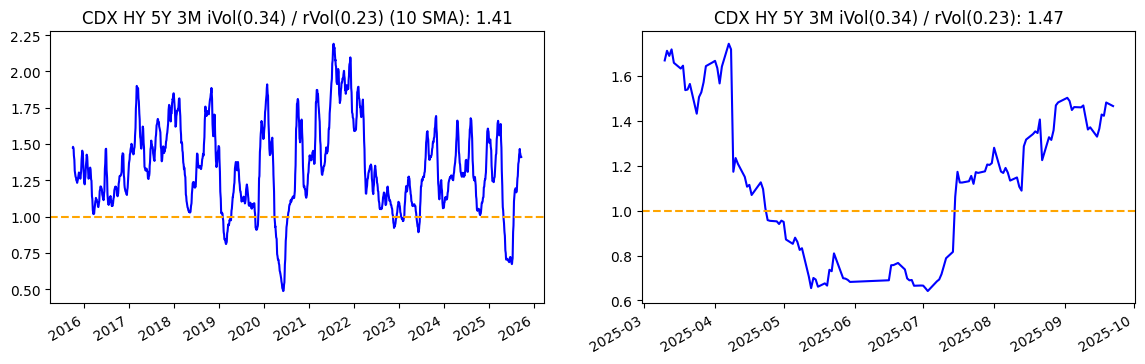

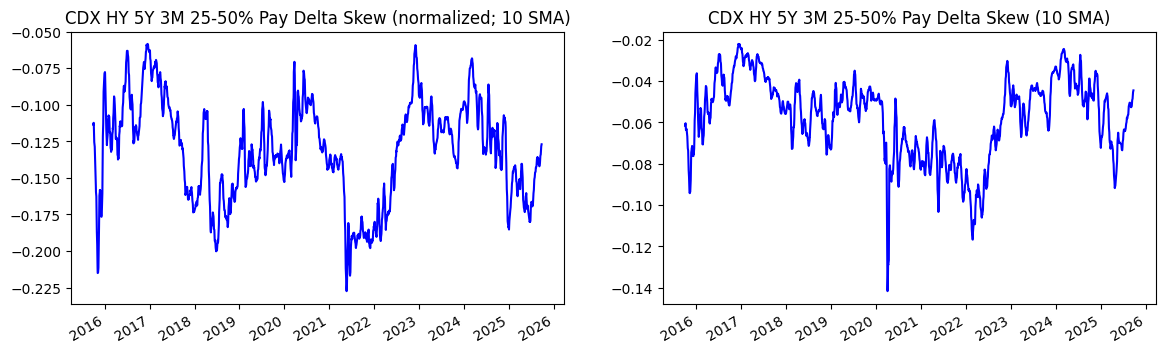

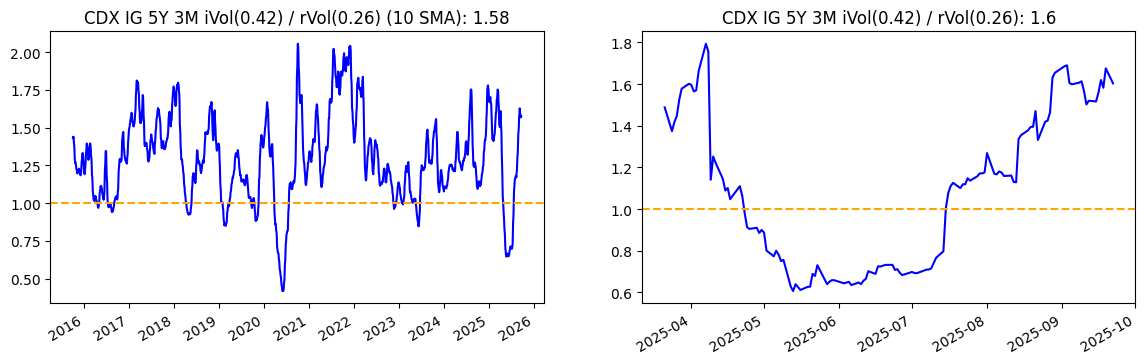

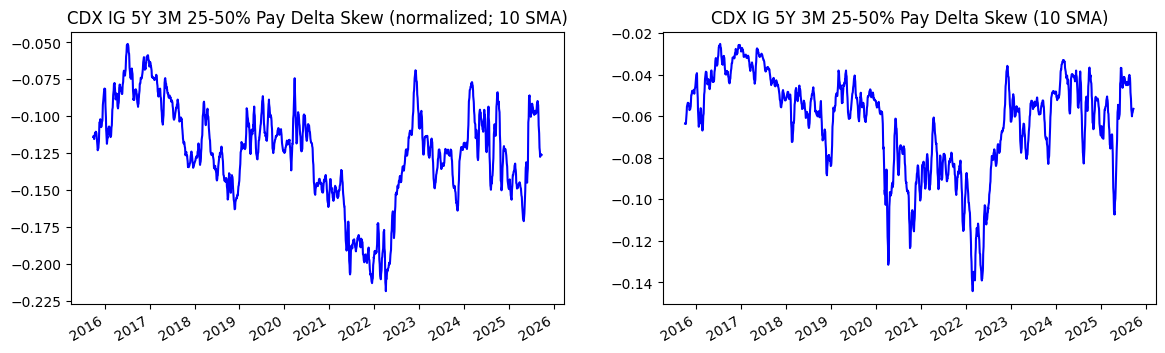

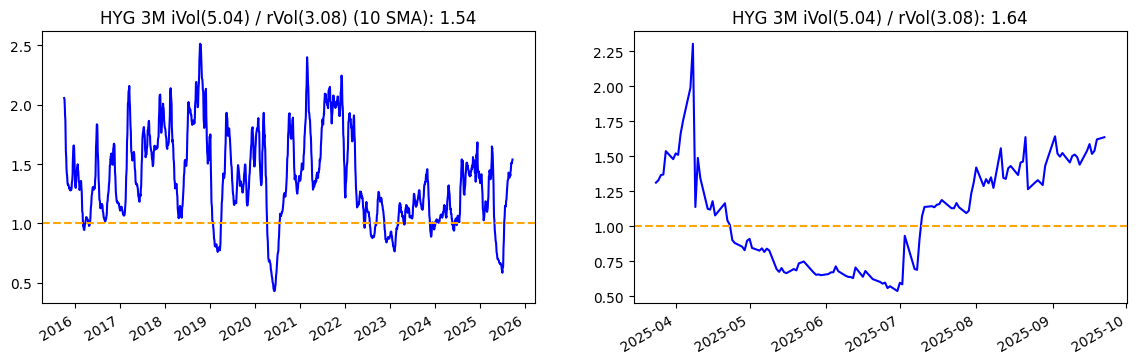

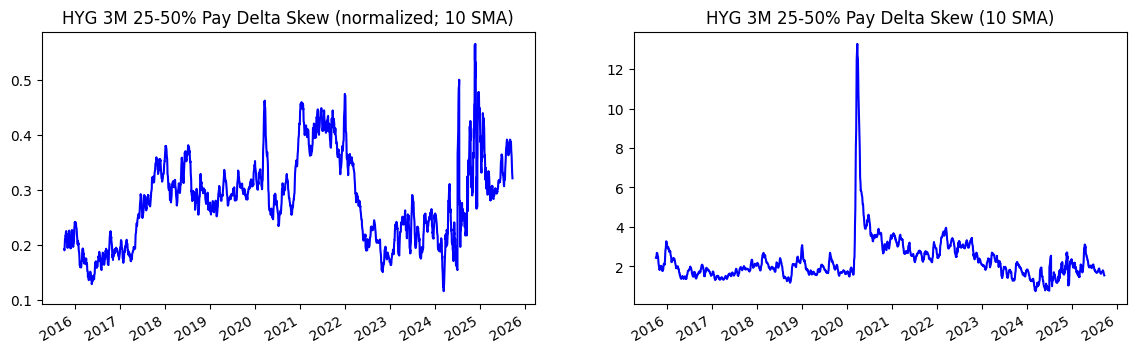

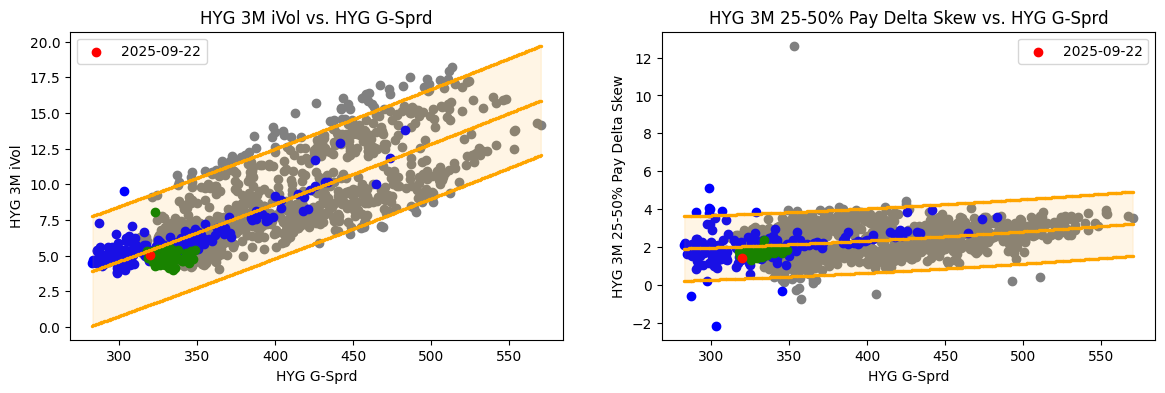

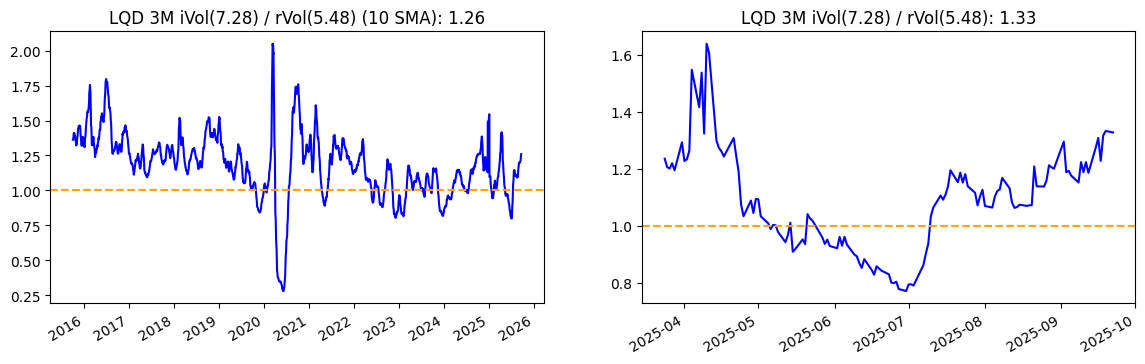

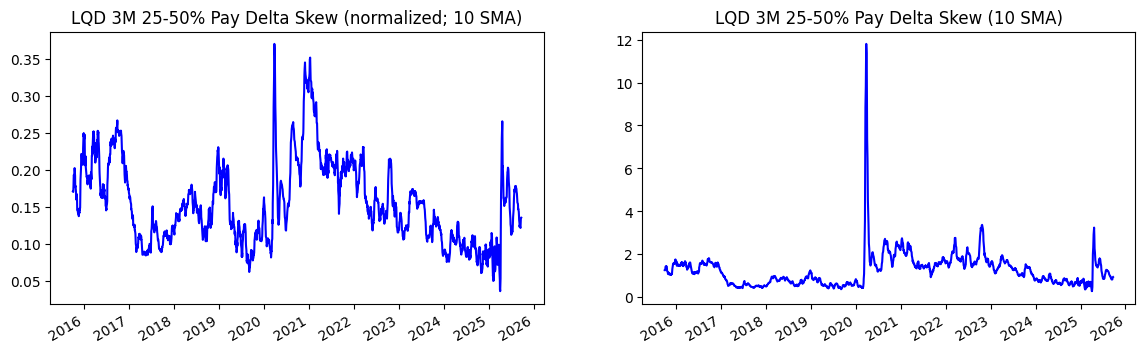

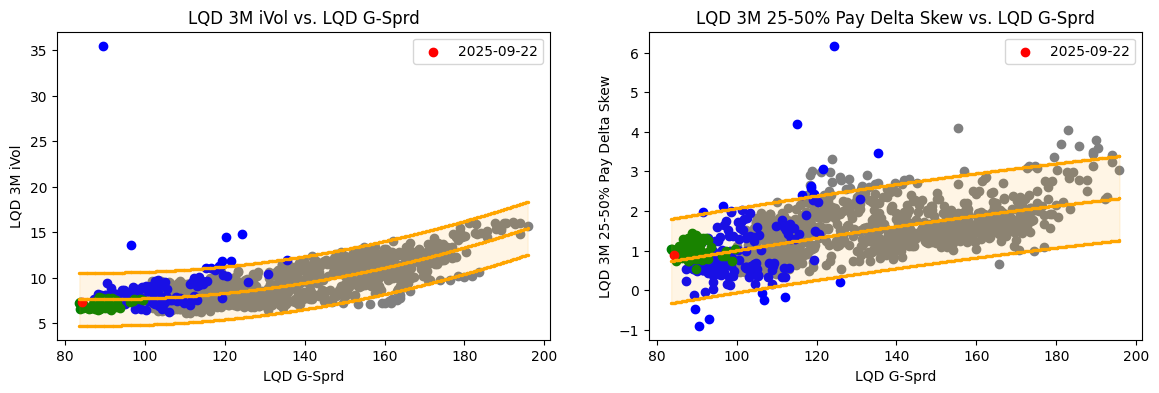

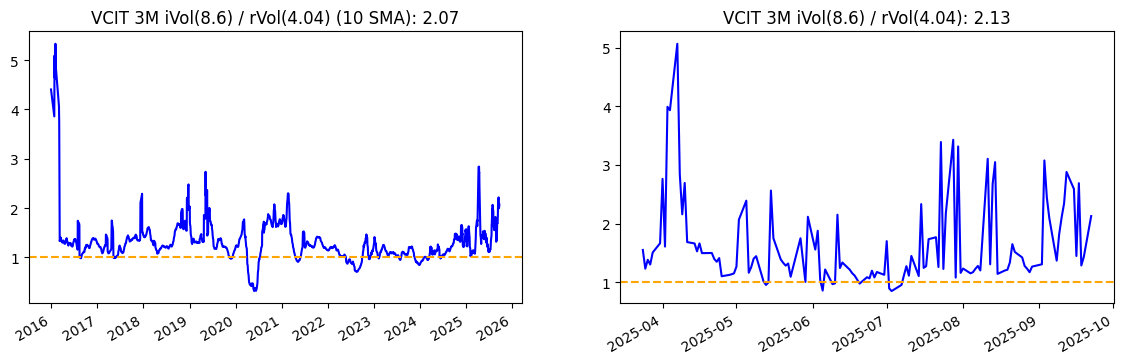

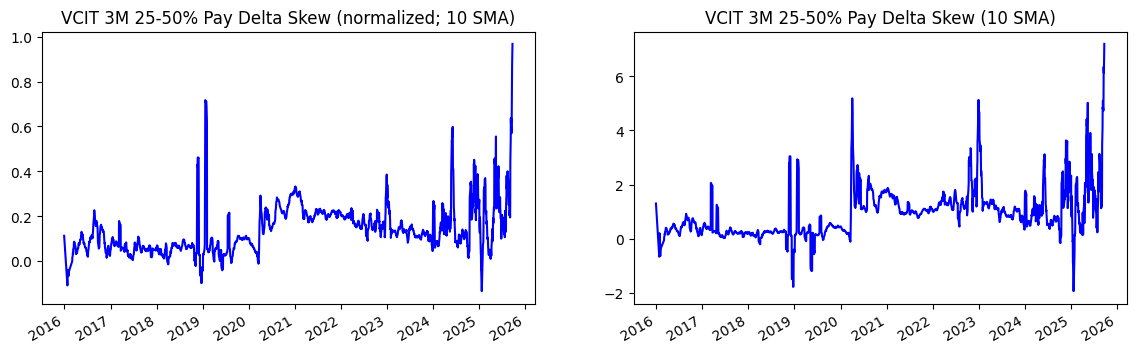

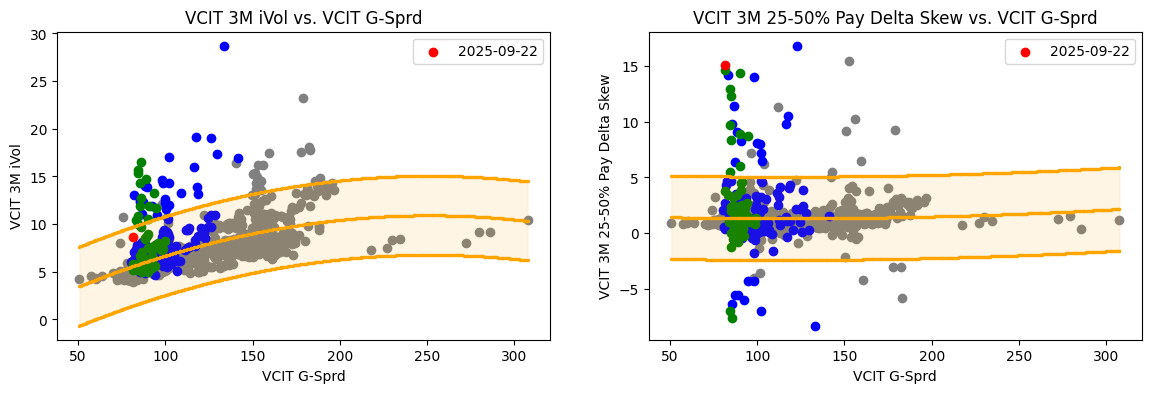

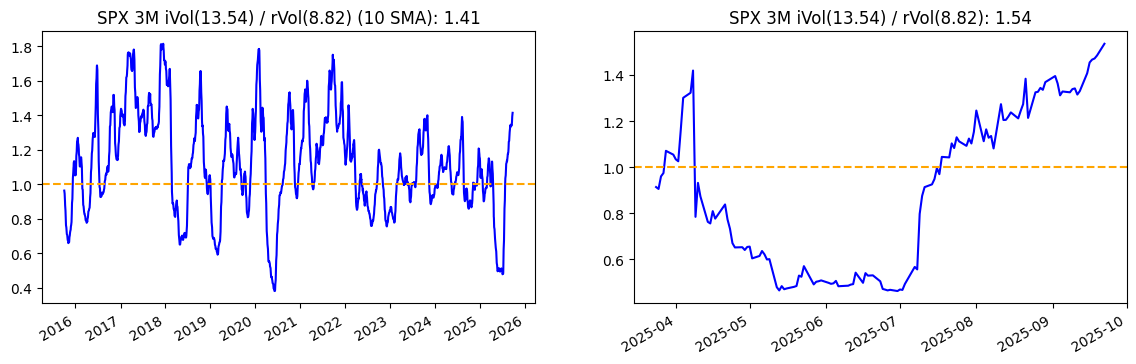

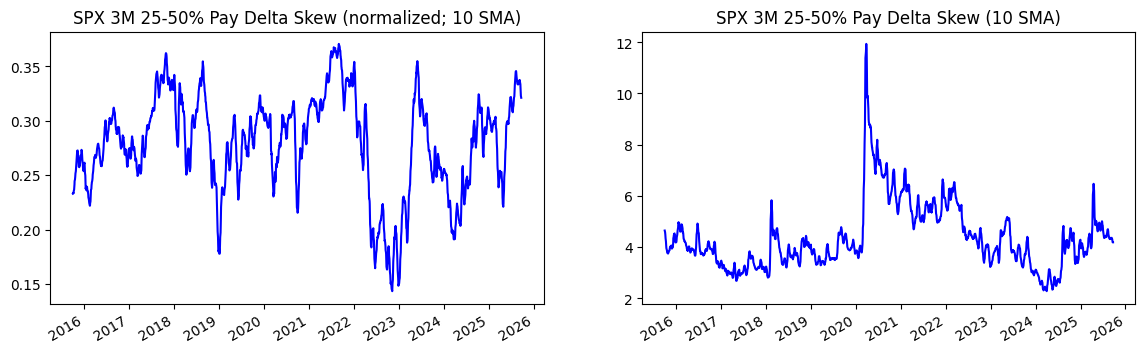

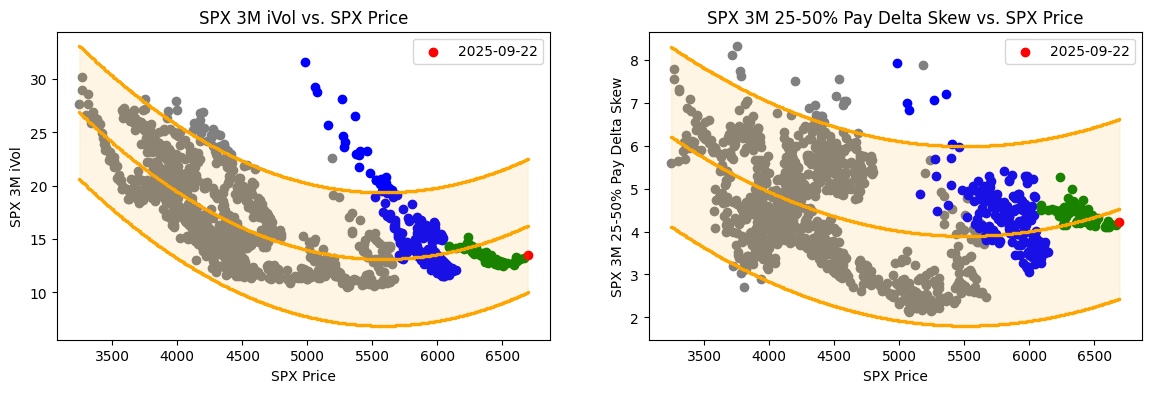

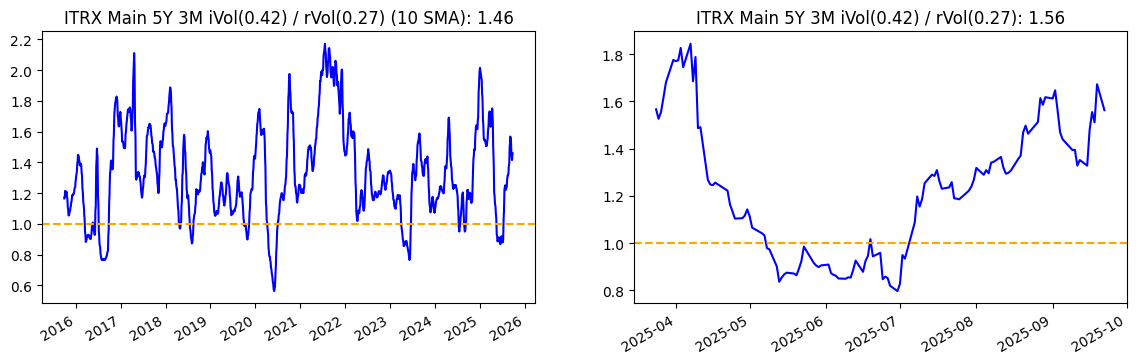

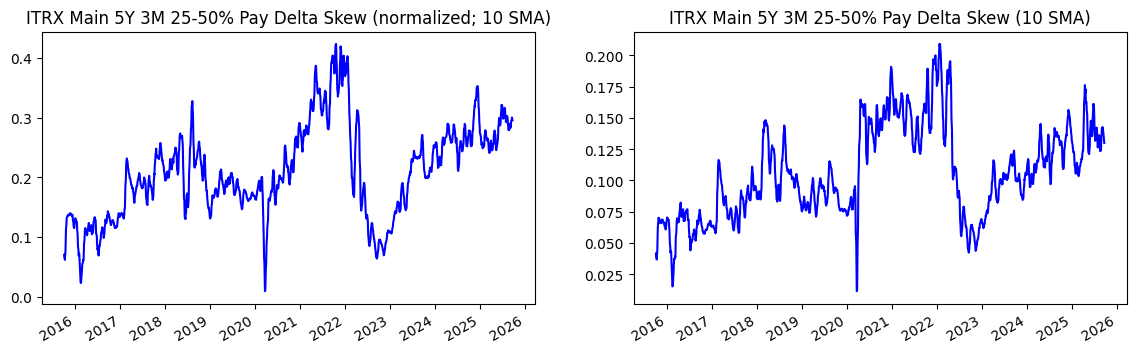

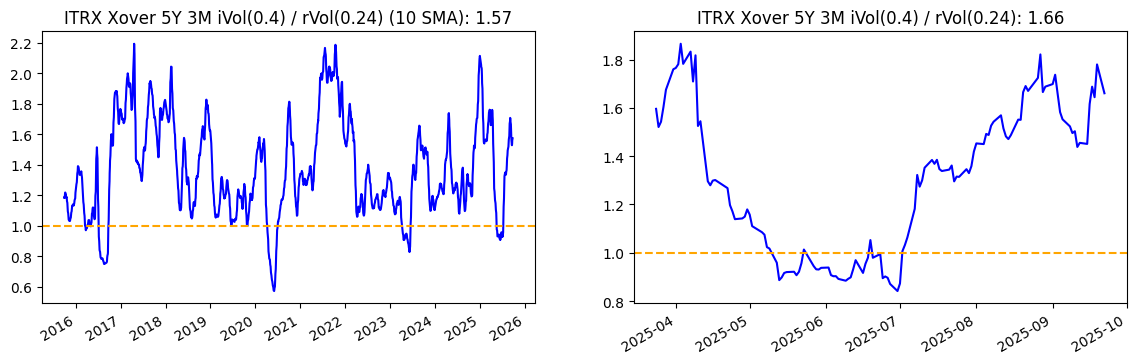

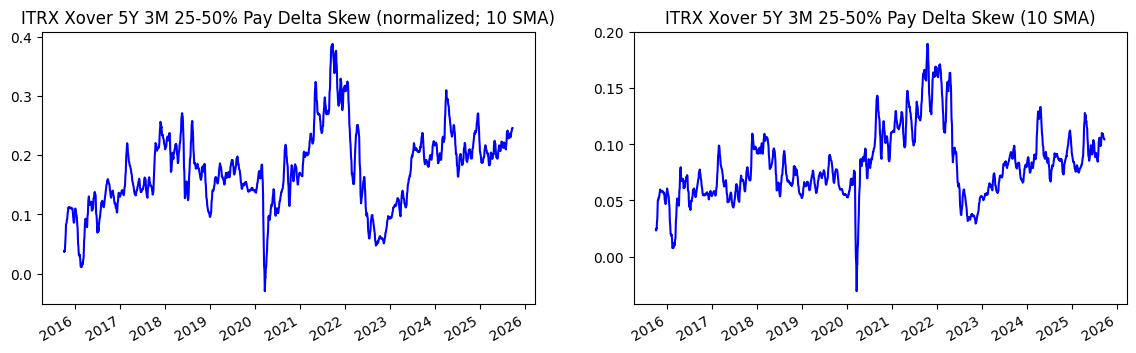

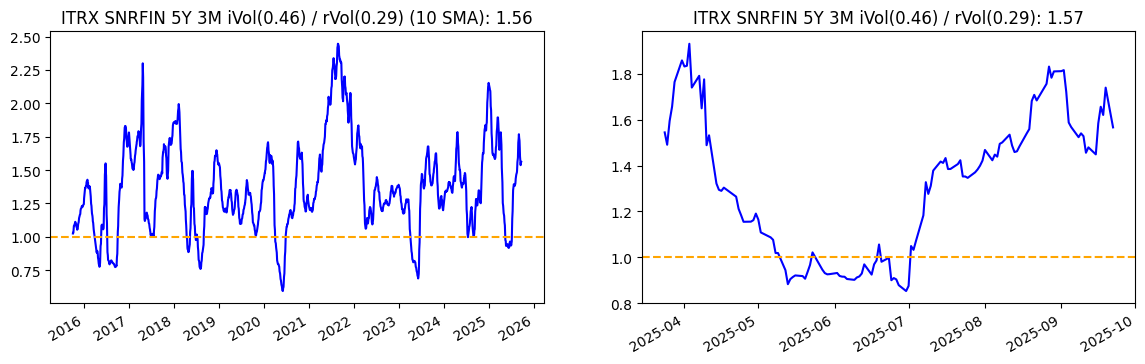

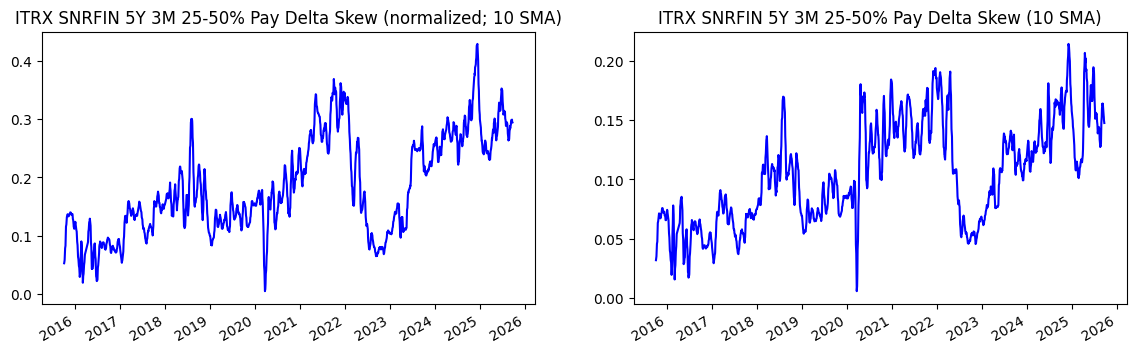

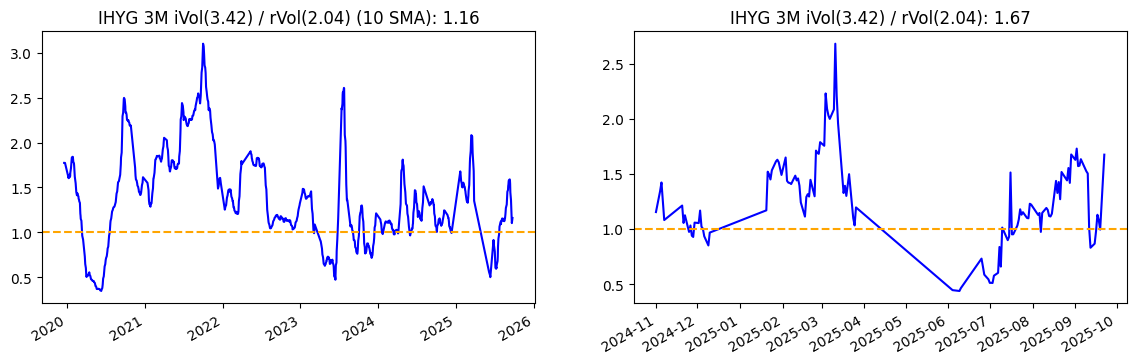

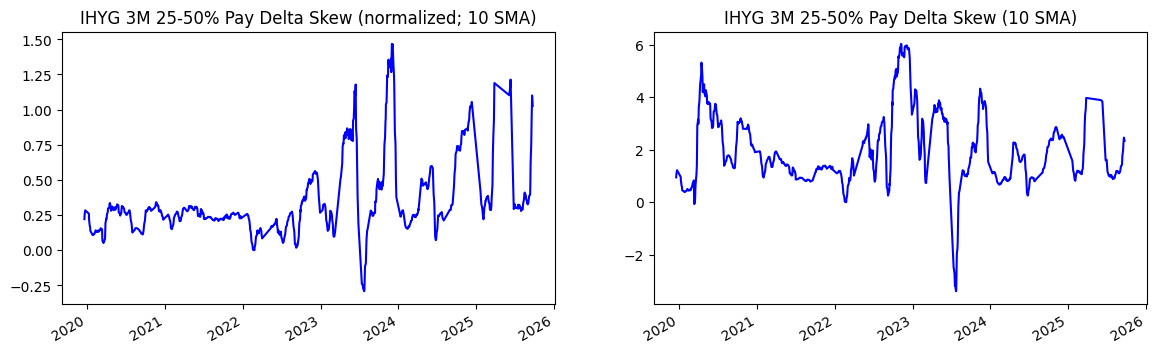

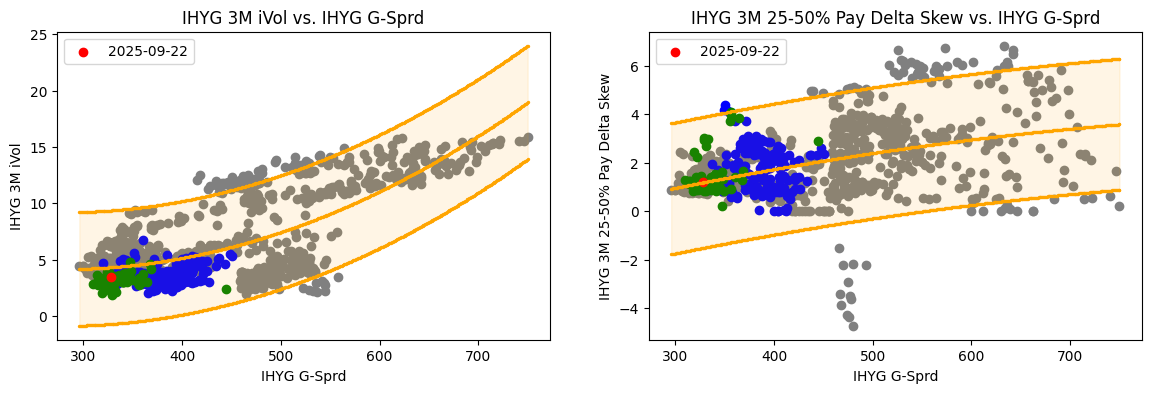

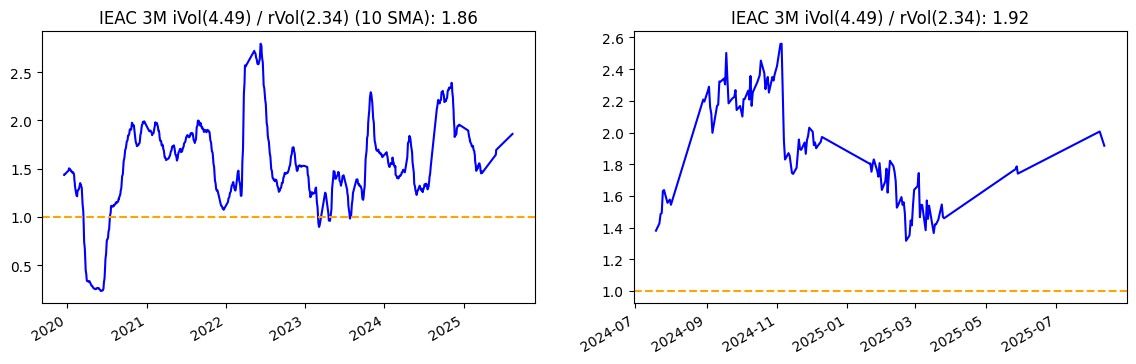

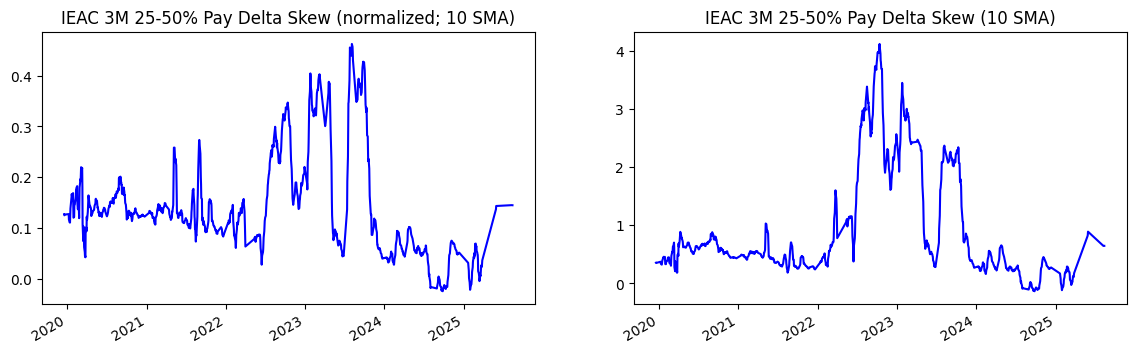

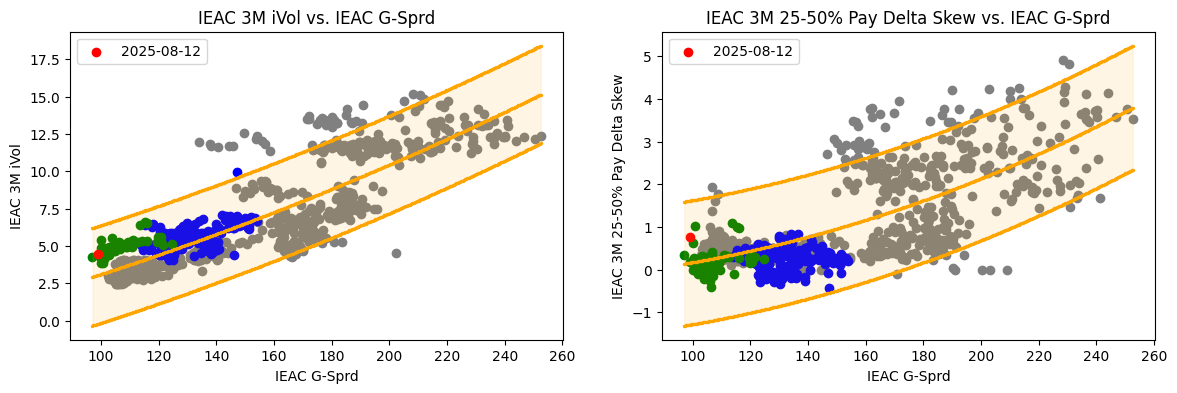

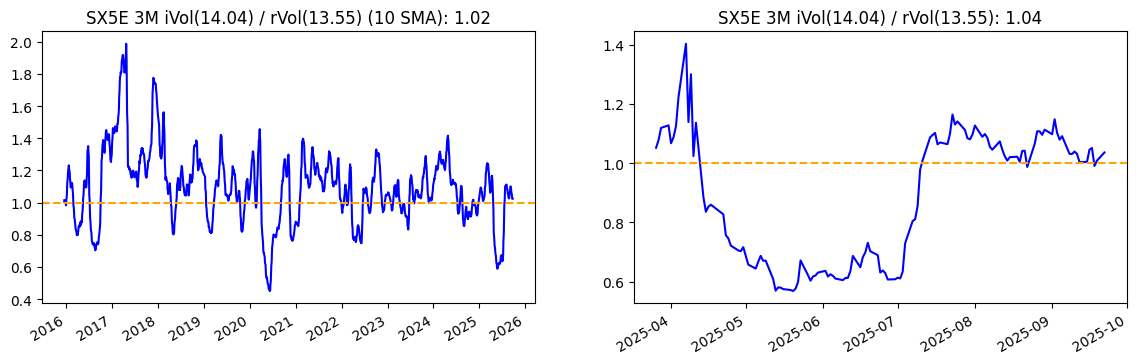

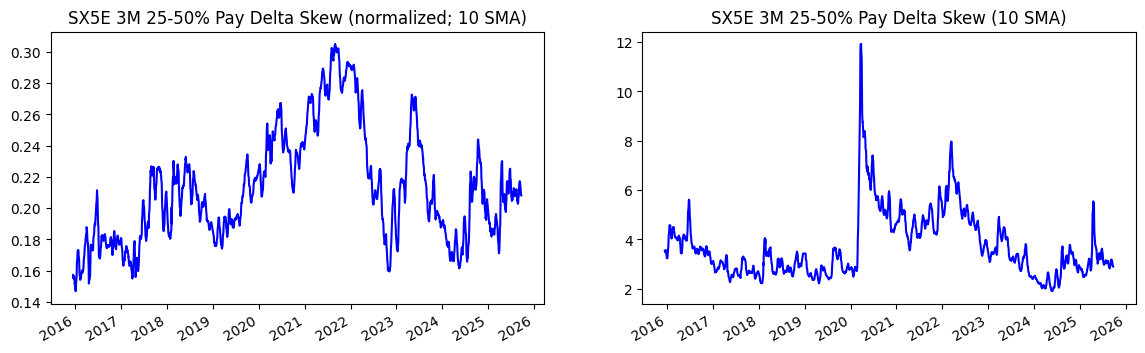

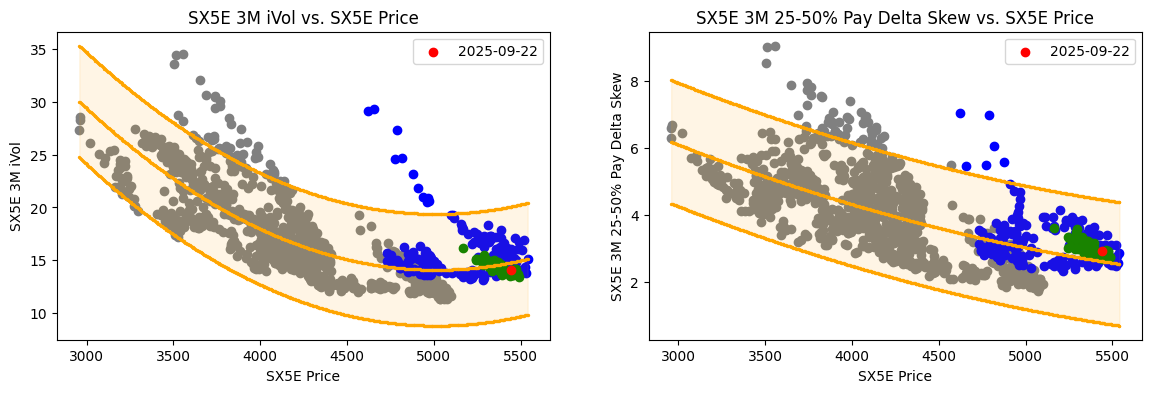

In [24]:
names_list = ["CDX HY 5Y","CDX IG 5Y","HYG","LQD","VCIT", "SPX", 'ITRX Main 5Y',\
              'ITRX Xover 5Y', 'ITRX SNRFIN 5Y', 'IHYG','IEAC','SX5E']

plot_num = 1
for item in names_list:
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    
    df1[f"{item} 3M iVol/rVol (10 SMA)"].dropna().plot(ax=axs[0],color="blue")
    last_ivol = round(df1[f"{item} 3M iVol"].dropna().iloc[-1],2)
    last_rvol = round(df1[f"{item} 3M rVol"].dropna().iloc[-1],2)
    last_10sma_vol_ratio = round(df1[f"{item} 3M iVol/rVol (10 SMA)"].dropna().iloc[-1],2)
    last_vol_ratio = round(df1[f"{item} 3M iVol/rVol"].dropna().iloc[-1],2)
    
    axs[0].axhline(1,color="orange",linestyle="--")
    axs[0].set_title(f"{item} 3M iVol({last_ivol}) / rVol({last_rvol}) (10 SMA): {last_10sma_vol_ratio}")
    
    df1[f"{item} 3M iVol/rVol"].dropna().iloc[-126:].plot(ax=axs[1],color="blue")
    axs[1].axhline(1,color="orange",linestyle="--")
    axs[1].set_title(f"{item} 3M iVol({last_ivol}) / rVol({last_rvol}): {last_vol_ratio}")
    plt.savefig(f"Plots/VolPremium_{item}_1.png")
    plt.show()
    
    fig, axs = plt.subplots(1, 2, figsize=(14,4))
    df1[f"{item} 3M 25-50% pay delta skew (normalized; 10 SMA)"].dropna().plot(ax=axs[0],color="blue")
    axs[0].set_title(f"{item} 3M 25-50% Pay Delta Skew (normalized; 10 SMA)")
    
    df1[f"{item} 3M 25-50% pay delta skew (10 SMA)"].dropna().plot(ax=axs[1],color="blue")
    axs[1].set_title(f"{item} 3M 25-50% Pay Delta Skew (10 SMA)")
    plt.savefig(f"Plots/VolSkew_{item}.png")
    plt.show()

    for name in bbg.columns:
        if name.startswith(item):
            scatter_df = pd.concat([df1[f"{item} 3M iVol"], bbg[name]],axis=1).sort_index().dropna().copy()
            scatter_df1 = pd.concat([df1[f"{item} 3M 25-50% pay delta skew"], bbg[name]],axis=1).sort_index().dropna().copy()
            
            fig, axs = plt.subplots(1, 2, figsize=(14,4))
            
            axs[0].scatter(scatter_df[name].iloc[:-252], scatter_df[f"{item} 3M iVol"].iloc[:-252], color="gray")
            axs[0].scatter(scatter_df[name].iloc[-252:-63], scatter_df[f"{item} 3M iVol"].iloc[-252:-63], color="blue")
            axs[0].scatter(scatter_df[name].iloc[-63:-1], scatter_df[f"{item} 3M iVol"].iloc[-63:-1], color="green")
            axs[0].scatter(scatter_df[name].iloc[-1:], scatter_df[f"{item} 3M iVol"].iloc[-1:], color="red",\
                           label=f"{str(scatter_df.index[-1].date())}")

            x_scatter = pd.to_numeric(scatter_df[name], errors='coerce')
            y_scatter = pd.to_numeric(scatter_df[f"{item} 3M iVol"], errors='coerce')
            valid_mask = (~x_scatter.isna()) & (~y_scatter.isna())
            x_scatter = x_scatter[valid_mask]
            y_scatter = y_scatter[valid_mask]
            coeffs = np.polyfit(x_scatter, y_scatter, 2)
            polynomial = np.poly1d(coeffs)
            x_poly=np.linspace(min(x_scatter),max(x_scatter),500)
            y_poly=polynomial(x_poly)
            y_pred = polynomial(x_scatter)
            r2=r2_score(y_scatter,y_pred)
            equation_text = f"y = {coeffs[0]:.4f}*x² + {coeffs[1]:.4f}*x + {coeffs[2]:.4f}"
            residuals = y_scatter-y_pred
            res_sum = np.sum(residuals**2)
            dof = len(x_scatter)-len(coeffs)
            res_var = res_sum / dof
            se = np.sqrt(res_var)
            conf_upper = y_poly + 2 * se
            conf_lower = y_poly - 2 * se
            
            axs[0].scatter(x_poly, y_poly,color="orange",s=2)
            axs[0].scatter(x_poly, conf_upper,color="orange",s=2)
            axs[0].scatter(x_poly, conf_lower,color="orange",s=2)
            axs[0].fill_between(x_poly, conf_lower, conf_upper, color="orange", alpha=0.1)
            
            axs[0].set_ylabel(f"{item} 3M iVol")
            axs[0].set_xlabel(f"{name}")
            axs[0].set_title(f"{item} 3M iVol vs. {name}")
            axs[0].legend()
            
            axs[1].scatter(scatter_df1[name].iloc[:-252], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[:-252], color="gray")
            axs[1].scatter(scatter_df1[name].iloc[-252:-63], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-252:-63], color="blue")
            axs[1].scatter(scatter_df1[name].iloc[-63:-1], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-63:-1], color="green")
            axs[1].scatter(scatter_df1[name].iloc[-1:], scatter_df1[f"{item} 3M 25-50% pay delta skew"].iloc[-1:],\
                           color="red", label=f"{str(scatter_df1.index[-1].date())}")
            
            x_scatter = pd.to_numeric(scatter_df1[name], errors='coerce')
            y_scatter = pd.to_numeric(scatter_df1[f"{item} 3M 25-50% pay delta skew"], errors='coerce')
            valid_mask = (~x_scatter.isna()) & (~y_scatter.isna())
            x_scatter = x_scatter[valid_mask]
            y_scatter = y_scatter[valid_mask]
            coeffs = np.polyfit(x_scatter, y_scatter, 2)
            polynomial = np.poly1d(coeffs)
            x_poly=np.linspace(min(x_scatter),max(x_scatter),500)
            y_poly=polynomial(x_poly)
            y_pred = polynomial(x_scatter)
            r2=r2_score(y_scatter,y_pred)
            equation_text = f"y = {coeffs[0]:.4f}*x² + {coeffs[1]:.4f}*x + {coeffs[2]:.4f}"
            residuals = y_scatter-y_pred
            res_sum = np.sum(residuals**2)
            dof = len(x_scatter)-len(coeffs)
            res_var = res_sum / dof
            se = np.sqrt(res_var)
            conf_upper = y_poly + 2 * se
            conf_lower = y_poly - 2 * se
            axs[1].scatter(x_poly, y_poly,color="orange",s=2)
            axs[1].scatter(x_poly, conf_upper,color="orange",s=2)
            axs[1].scatter(x_poly, conf_lower,color="orange",s=2)
            axs[1].fill_between(x_poly, conf_lower, conf_upper, color="orange", alpha=0.1)
            
            axs[1].set_ylabel(f"{item} 3M 25-50% Pay Delta Skew")
            axs[1].set_xlabel(f"{name}")
            axs[1].set_title(f"{item} 3M 25-50% Pay Delta Skew vs. {name}")
            axs[1].legend()
            plt.savefig(f"Plots/VolPremium_{item}_2.png")
            plot_num += 1
            plt.show()
            
            
    # break

In [ ]:
import os
import win32com.client

folder_path = r'J:\56. Vol Daily Emails\Plots'

images = [f for f in os.listdir(folder_path) if f.endswith('.png')]

outlook = win32com.client.Dispatch("Outlook.Application")
mail = outlook.CreateItem(0)

html_body = '<html><body>'

for j, image in enumerate(images):
    file_path = os.path.join(folder_path, image)
    if os.path.exists(file_path):
        cid = f'image{j}'  # Create a unique CID for each image
        attachment = mail.Attachments.Add(Source=file_path)
        attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", cid)
        html_body += f'<br><br><img src="cid:{cid}"><br>'
    else:
        print(f"File {file_path} not found")

html_body += '</body></html>'
mail.HTMLBody = html_body

mail.Subject = 'Volatility Dashboard (auto)'
mail.CC = 'vasu.sharma@iiicm.com'
# if email_both:
mail.To = 'spyros.michas@iiicm.com'
if send_email:
    mail.Send()
    print("Email sent successfully")

In [ ]:
names_list

In [ ]:
import os
import win32com.client

folder_path = r'J:\56. Vol Daily Emails\Plots'

images = [f for f in os.listdir(folder_path) if f.endswith('.png')]
images